In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from scipy.spatial.distance import squareform

In [2]:
target_classes = ["Calanoid_1", "Cyclopoid_1"]

In [3]:
file_path = "SIMC_Predictor_Selection_Dataset.csv"
df = pd.read_csv(file_path)

In [4]:
geometric_features = ['Area..ABD.', 'Area..Filled.', 'Diameter..ABD.', 'Diameter..ESD.', 'Diameter..FD.',
                      'Length','Width', 'Perimeter', 'Volume..ABD.', 'Volume..ESD.', 'Geodesic.Length', 
                      'Geodesic.Thickness']

shape_features = ['Aspect.Ratio', 'Circle.Fit', 'Circularity', 'Circularity..Hu.', 'Compactness', 
                  'Convex.Perimeter', 'Convexity', 'Fiber.Curl', 'Fiber.Straightness', 
                  'Geodesic.Aspect.Ratio', 'Roughness', 'Elongation', 'Symmetry']

optical_features = ['Edge.Gradient', 'Intensity','Sigma.Intensity', 'Sum.Intensity', 'Transparency']

environmental_features = ['gdd2', 'WaterT', 'avgdepth', 'MinDepth', 'MaxDepth', 'CLOUD_PC', 'PRECIP', 
                          'distshore', 'Exposure', 'XANGLE', 'XWAVEHT']

sampling_features = ['SITE', 'Loc', 'LAT0', 'LAT1', 'LON0', 'LON1']

biological_features = ['WhitefishDen', 'UnknwCoregonine', 'CiscoDen']

sum_features = geometric_features + shape_features + optical_features + environmental_features + sampling_features + biological_features

sum_features_drop = [feature for feature in sum_features if feature not in ['SITE', 'Loc']]

# Hierarchical Clustering

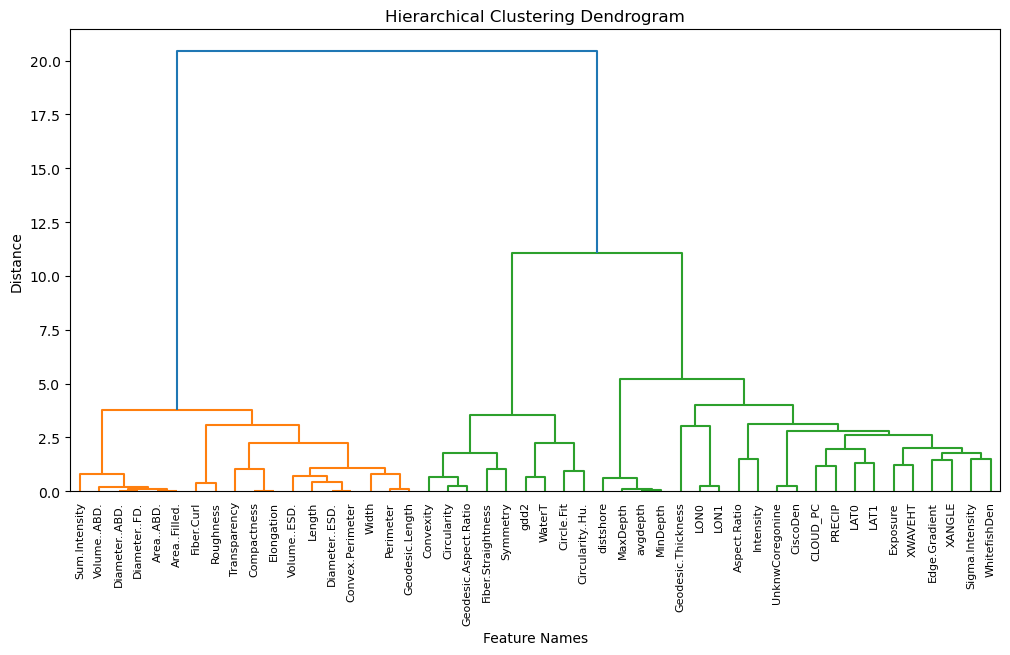

In [11]:
df_selected = df[sum_features_drop]

corr_matrix = df_selected.corr()

linkage_matrix = linkage(corr_matrix, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Feature Names")
plt.ylabel("Distance")
plt.show()

In [7]:
distance_matrix = 1 - np.abs(corr_matrix)

linkage_matrix = linkage(squareform(distance_matrix), method='ward')

max_d = 0.01
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

cluster_df = pd.DataFrame({'Feature': corr_matrix.columns, 'Cluster': clusters})

cluster_groups = cluster_df.groupby('Cluster')['Feature'].apply(list)

filtered_clusters = cluster_groups[cluster_groups.apply(len) > 1]

print("Filtered Clusters (Distance < 0.01):")
print(filtered_clusters)

Filtered Clusters (Distance < 0.01):
Cluster
1                   [avgdepth, MinDepth]
23       [Diameter..ABD., Diameter..FD.]
24           [Area..ABD., Area..Filled.]
27          [Perimeter, Geodesic.Length]
28    [Diameter..ESD., Convex.Perimeter]
37             [Compactness, Elongation]
Name: Feature, dtype: object


In [13]:
distance_matrix = 1 - np.abs(corr_matrix)

linkage_matrix = linkage(squareform(distance_matrix), method='ward')

max_d = 0.05
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

cluster_df = pd.DataFrame({'Feature': corr_matrix.columns, 'Cluster': clusters})

cluster_groups = cluster_df.groupby('Cluster')['Feature'].apply(list)

filtered_clusters = cluster_groups[cluster_groups.apply(len) > 1]

print("Filtered Clusters (Distance < 0.05):")
print(filtered_clusters)

Filtered Clusters (Distance < 0.05):
Cluster
1                        [avgdepth, MinDepth, MaxDepth]
3                                          [LON0, LON1]
21    [Area..ABD., Area..Filled., Diameter..ABD., Di...
23                         [Perimeter, Geodesic.Length]
24           [Diameter..ESD., Length, Convex.Perimeter]
27                     [Fiber.Curl, Fiber.Straightness]
29                 [Circularity, Geodesic.Aspect.Ratio]
30                            [Compactness, Elongation]
Name: Feature, dtype: object


# Analysis Summary

In [ ]:
group1 = ['Area..ABD.', 'Area..Filled.']
group2 = ['avgdepth', 'MinDepth', 'MaxDepth']
group3 = ['Diameter..ABD.', 'Diameter..FD.']
group4 = ['Perimeter', 'Geodesic.Length']
group5 = ['Diameter..ESD.', 'Convex.Perimeter']
group6 = ['Compactness', 'Elongation']